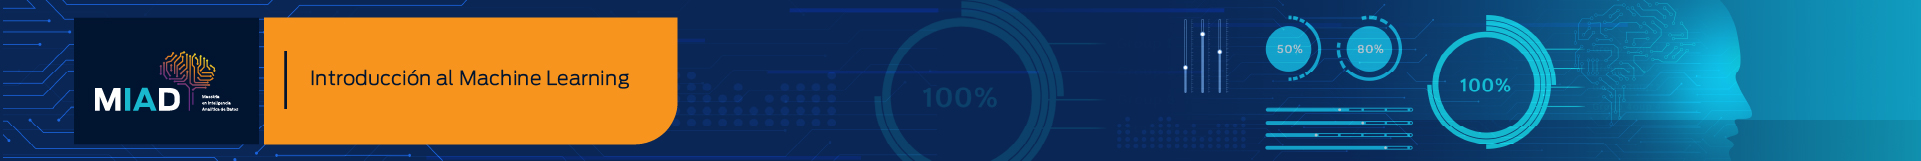

# Introducción al Machine Learning - Semana 3
## Caso: Implementación de modelos de clasificación lineales

### Propósito de la actividad

En esta actividad podrán poner en práctica, con un conjunto de datos reales, su habilidad para implementar modelos lineales y seleccionar aquel que tenga el mejor desempeño para resolver un problema de clasificación. En particular, se deberán implementar modelos de linear discriminant analysis, quadratic discriminant analysis, naive bayes classifier y regresión logística.

Además, como en todo procedimiento de analítica de datos, se evaluará la exploración preliminar de los datos por medio de herramientas como histogramas, correlogramas y estadísticas descriptivas.

### Instrucciones generales

1. Para desarrollar el notebook, lo deberán descargar a un repositorio (pueden escoger el repositorio de su preferencia) para que lo puedan trabajar grupalmente.

2. Los procedimientos en el notebook deberán responderse en los espacios especificados para tal fin, debajo de cada uno de los puntos.

3. Para que la actividad sea calificada, deberán subir únicamente este mismo archivo con la extensión ".ipynb" a la actividad de "entrega calificada por el personal" correspondiente a este caso.

4. El archivo que suban debe poder ejecutarse localmente cuando sea descargado por el tutor, asumiendo que la base de datos de la actividad ya ha sido importada en el correspondiente archivo separado por comas (.csv).


### Criterios de evaluación

Los criterios que se evaluarán son: 

Análisis preliminar de variables: Se presentan correlogramas, histogramas y estadísticas descriptivas de las variables de la base de datos y se hace un análisis coherente de cada uno de ellos. [10 puntos] 

Estimación modelo LDA: Se estima el modelo usando LDA, se evalúa su desempeño en la muestra de test y se analizan correctamente los resultados y el procedimiento realizado. [20 puntos] 

Estimación modelo QDA: Se estima el modelo usando QDA, se evalúa su desempeño en la muestra de test y se analizan correctamente los resultados y el procedimiento realizado. [20 puntos] 

Estimación modelo NBC: Se estima el modelo usando NBC, se evalúa su desempeño en la muestra de test y se analizan correctamente los resultados y el procedimiento realizado. [20 puntos] 

Estimación modelo de regresión logística: Se estima el modelo usando regresión logística, se evalúa su desempeño en la muestra de test y se analizan correctamente los resultados y el procedimiento realizado. [20 puntos] 

Elección del mejor modelo: Se elige el mejor modelo de acuerdo a los resultados obtenidos y se justifica adecuadamente la elección. [10 puntos] 


### Datos

En esta ocasión usarán una base de datos disponible en la página R-Data. Esta base de datos corresponde a "SMarket", la cual contiene 8 variables predictivas sobre el índice financiero S&P500 y 1250 observaciones. De esta manera, el objetivo de la actividad es predecir si el precio del índice subirá o bajará al día siguiente.

Por lo anterior, en primer lugar deberán descargar la base de datos del siguiente enlace: https://drive.google.com/drive/folders/1YuWR657GDARSMPkUCVFNd2a5mX5zL16A?usp=sharing 

### 1. Análisis preliminar de variables (10 puntos)
Realicen un análisis preliminar de los predictores y de la variable de respuesta (correlogramas, histogramas y estadísticas descriptivas).

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [ ]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 1 ####
Smarket = pd.read_csv("Smarket.csv")
Smarket.drop(columns=["Unnamed: 0"], inplace=True)

Smarket

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.19130,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.29650,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.41120,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.27600,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.20570,Up
...,...,...,...,...,...,...,...,...
1245,2005,0.422,0.252,-0.024,-0.584,-0.285,1.88850,Up
1246,2005,0.043,0.422,0.252,-0.024,-0.584,1.28581,Down
1247,2005,-0.955,0.043,0.422,0.252,-0.024,1.54047,Up
1248,2005,0.130,-0.955,0.043,0.422,0.252,1.42236,Down


In [22]:
Smarket.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000
mean,2003.016000,0.003834,0.003919,0.001716,0.001636,0.00561,1.478305
std,1.409018,1.136299,1.136280,1.138703,1.138774,1.14755,0.360357
min,2001.000000,-4.922000,-4.922000,-4.922000,-4.922000,-4.92200,0.356070
25%,2002.000000,-0.639500,-0.639500,-0.640000,-0.640000,-0.64000,1.257400
50%,2003.000000,0.039000,0.039000,0.038500,0.038500,0.03850,1.422950
75%,2004.000000,0.596750,0.596750,0.596750,0.596750,0.59700,1.641675
max,2005.000000,5.733000,5.733000,5.733000,5.733000,5.73300,3.152470


In [ ]:
yTotal = Smarket['Direction']
XTotal = Smarket.drop(columns=['Direction'])

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.19130
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.29650
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.41120
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.27600
4,2001,0.614,-0.623,1.032,0.959,0.381,1.20570
...,...,...,...,...,...,...,...
1245,2005,0.422,0.252,-0.024,-0.584,-0.285,1.88850
1246,2005,0.043,0.422,0.252,-0.024,-0.584,1.28581
1247,2005,-0.955,0.043,0.422,0.252,-0.024,1.54047
1248,2005,0.130,-0.955,0.043,0.422,0.252,1.42236


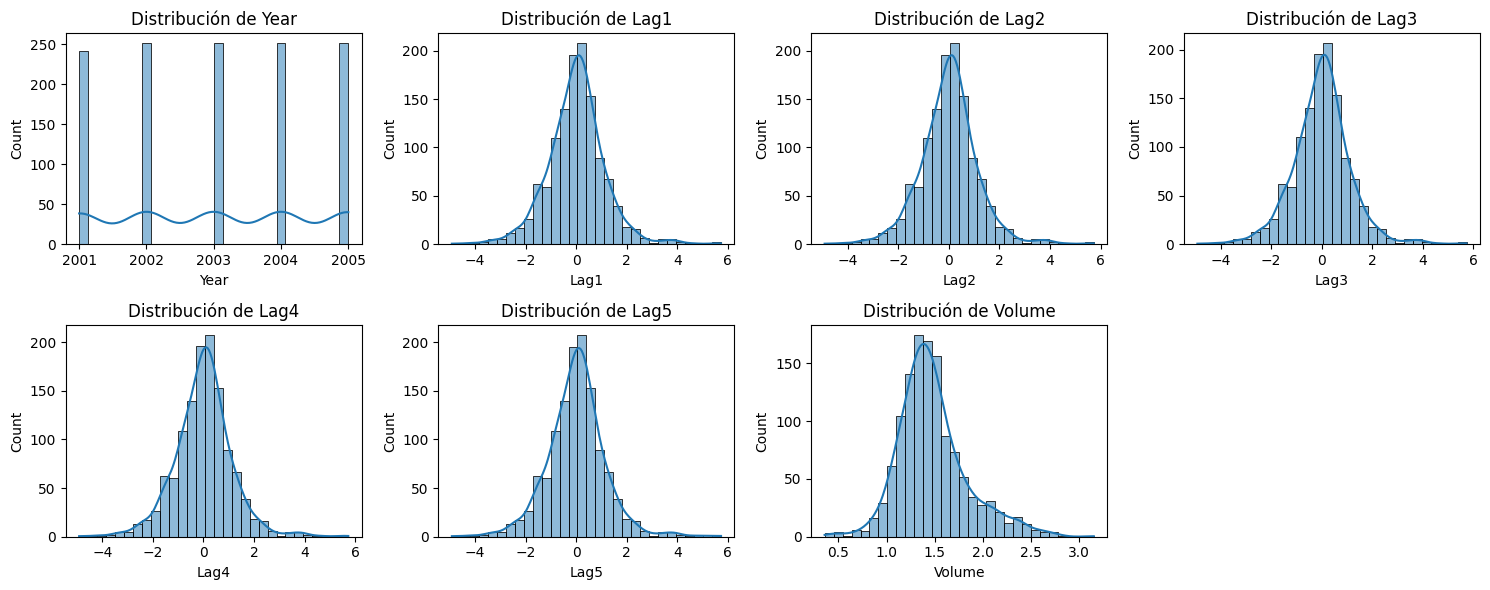

In [31]:
plt.figure(figsize=(15, 6))
for i, col in enumerate(XTotal.columns):
    plt.subplot(2, 4, i+1)
    sns.histplot(Smarket[col], bins=30, kde=True)
    plt.title(f'Distribución de {col}')
plt.tight_layout()
plt.show()

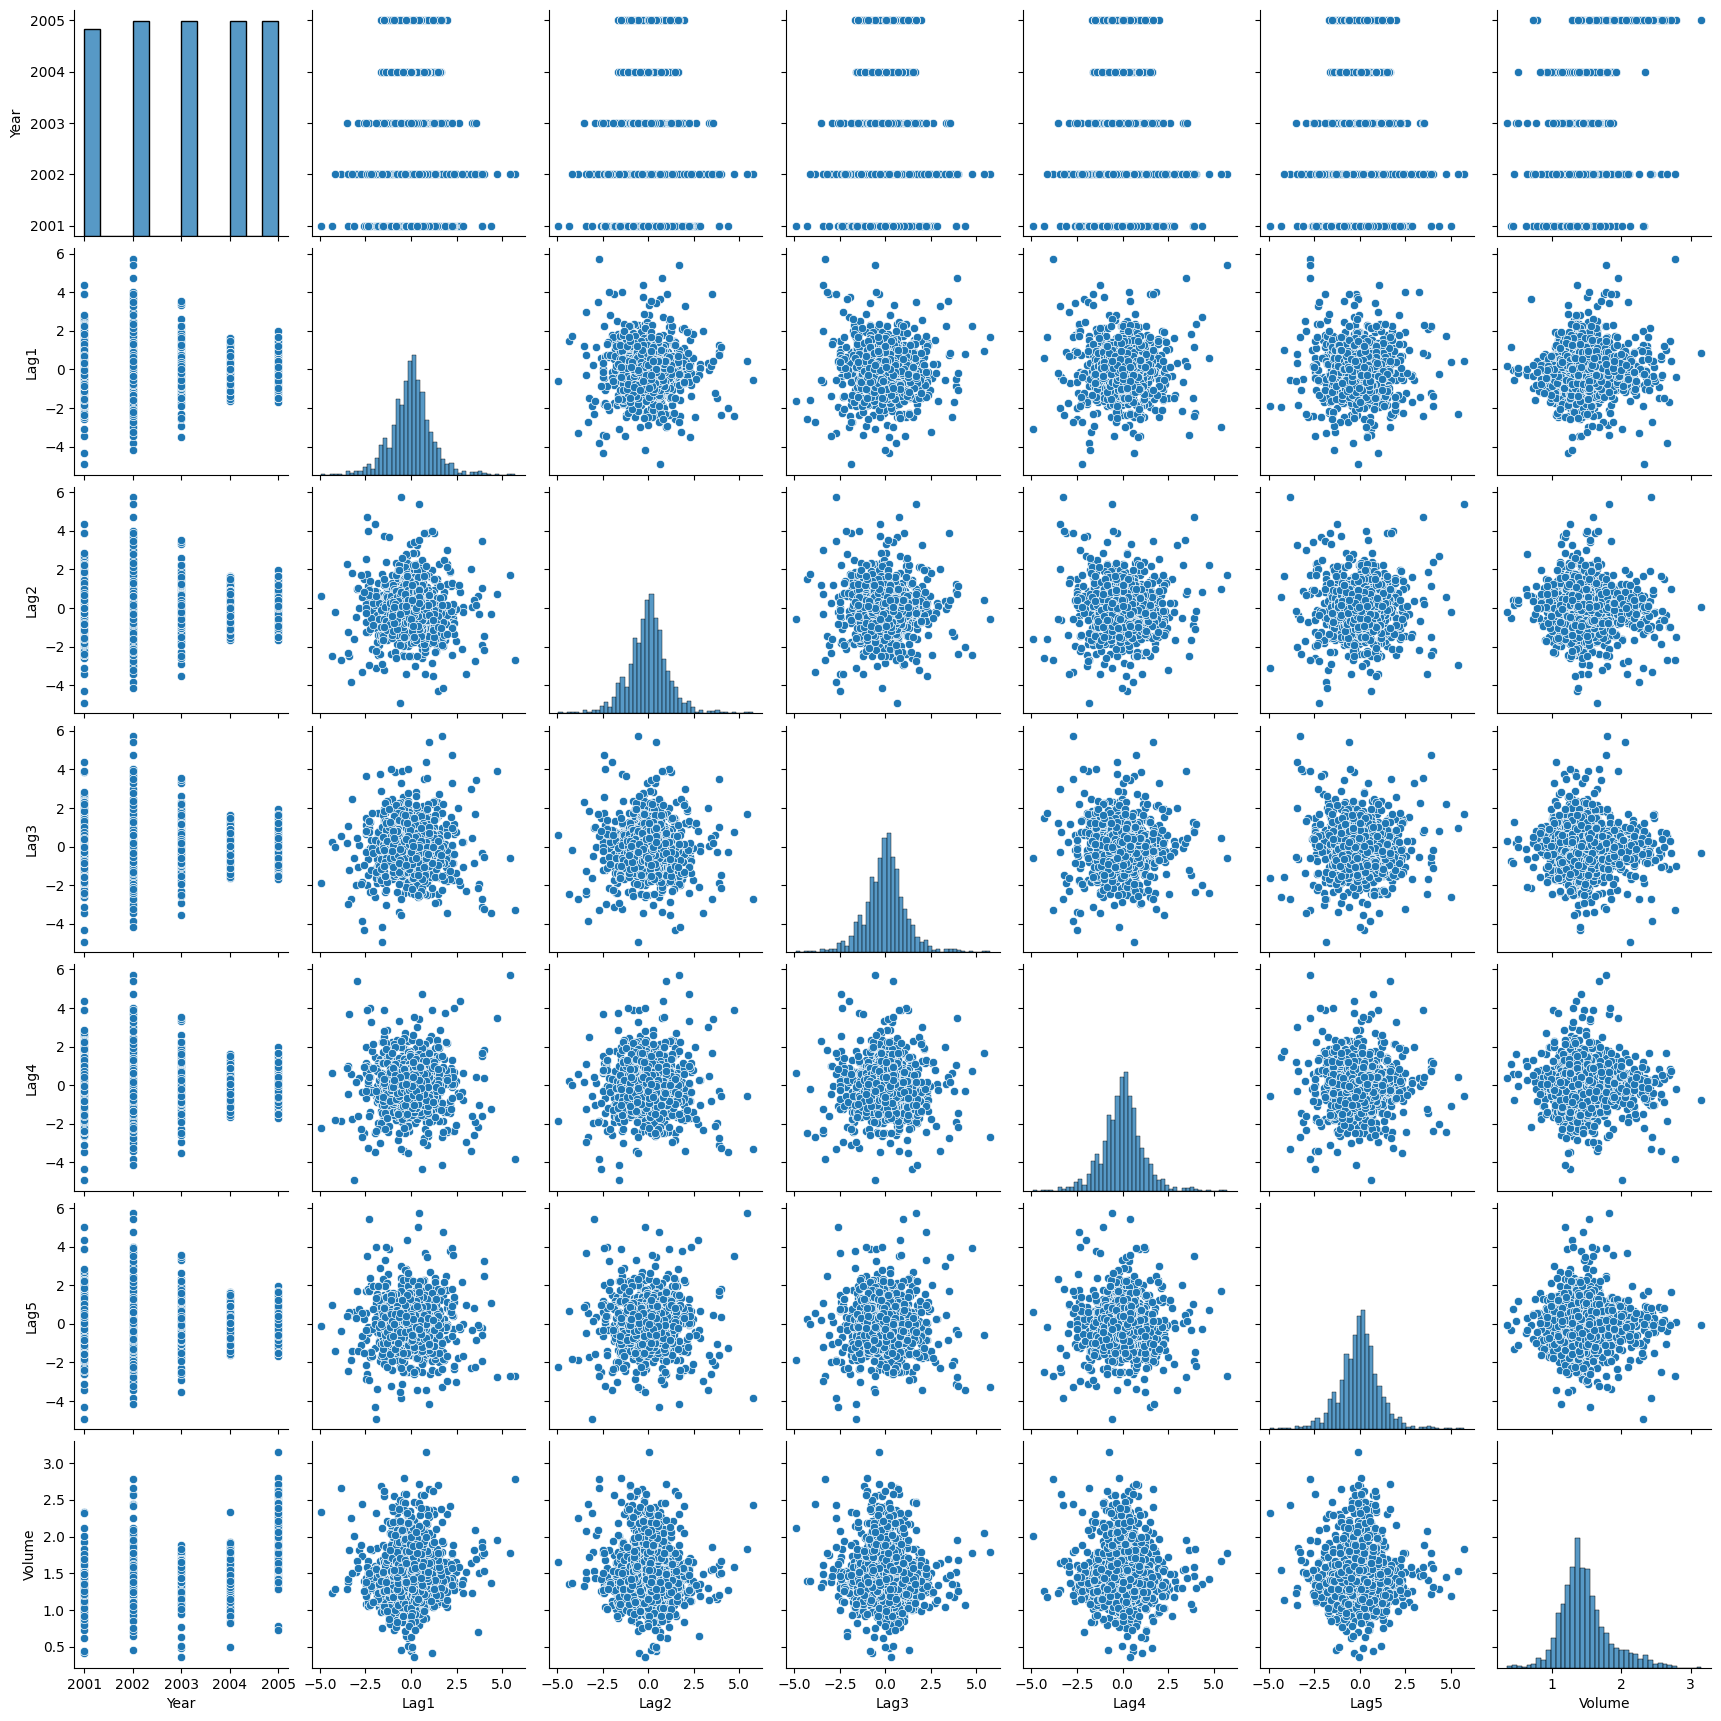

In [33]:
XTotalAux=pd.DataFrame(XTotal)
sns.pairplot(XTotalAux, kind="scatter")
plt.show()

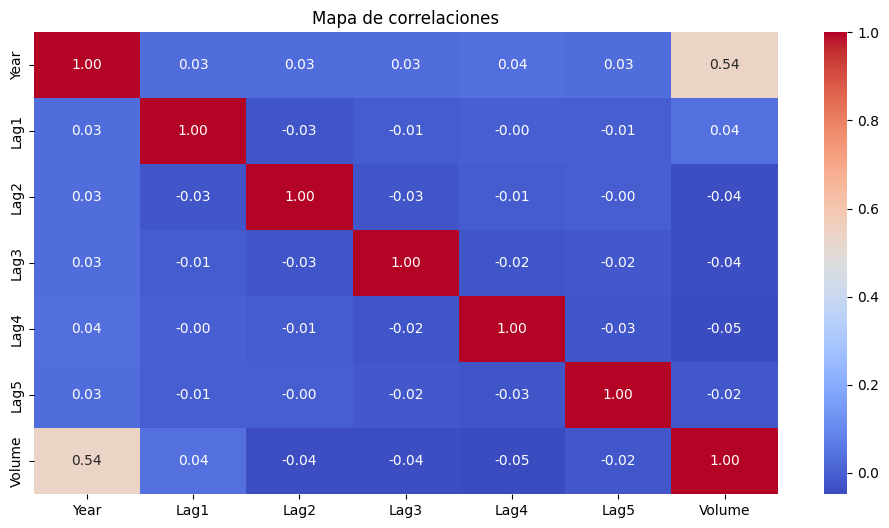

In [35]:
plt.figure(figsize=(12, 6))
sns.heatmap(XTotal.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Mapa de correlaciones")
plt.show()

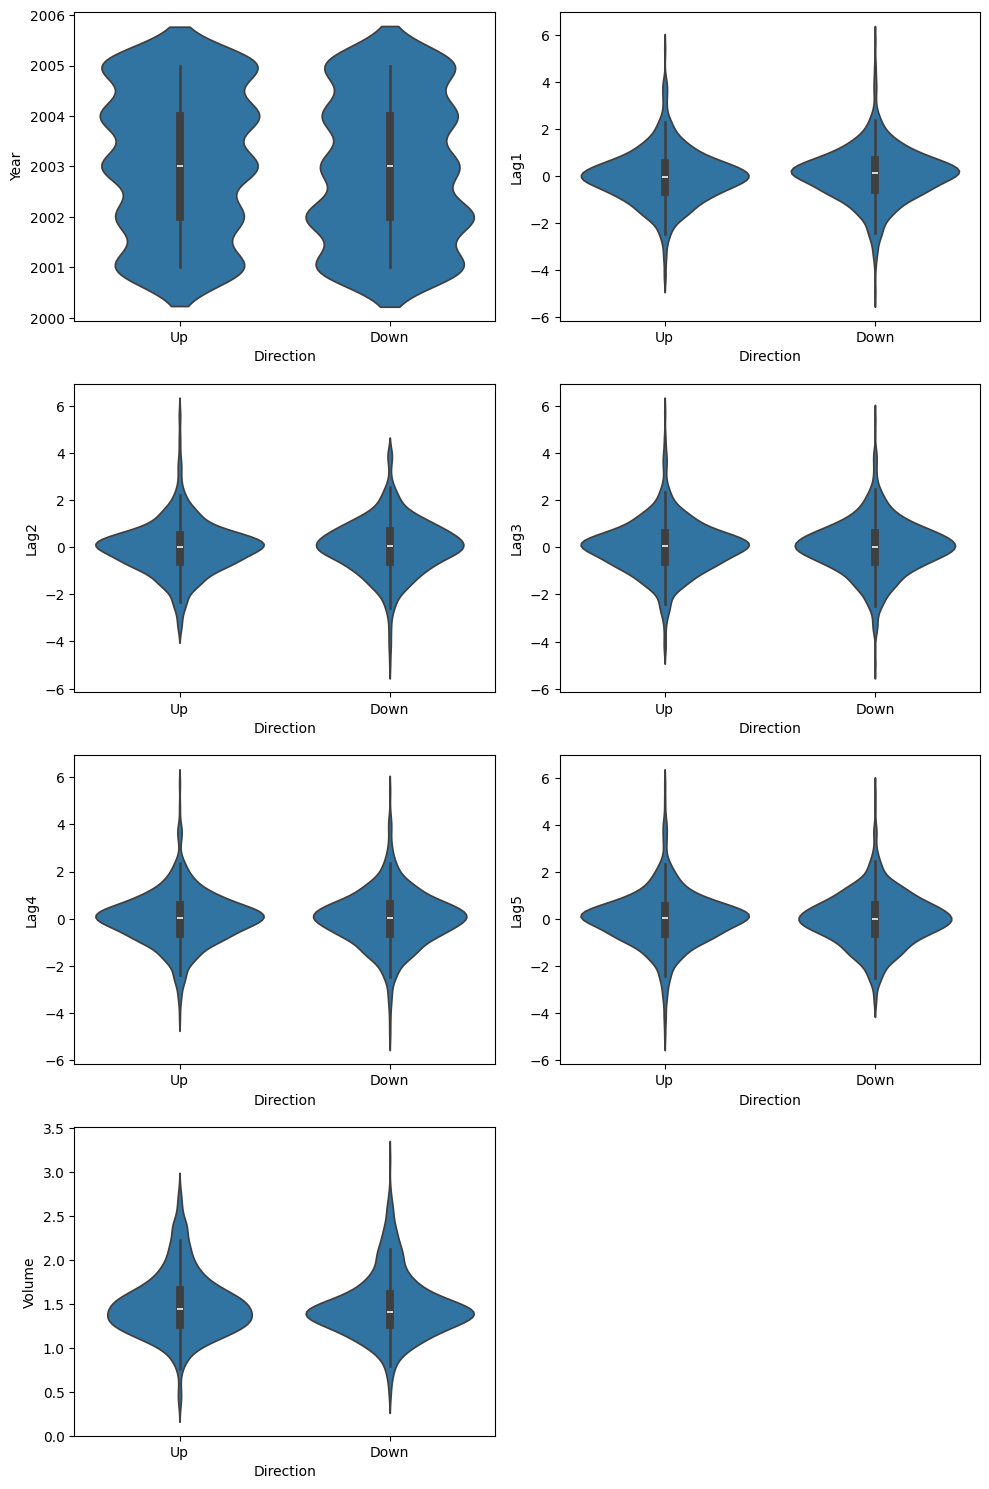

In [45]:

plt.figure(figsize=(10, 15))

for i, col in enumerate(XTotal.columns):
    plt.subplot(4, 2, i+1)
    sns.violinplot(x='Direction', y=col, data=Smarket)

plt.tight_layout()
plt.show()

In [47]:
XTrain, XTest, yTrain, yTest = train_test_split(XTotal, yTotal, test_size=0.33, random_state=0)

(Utilicen este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 1)

### 2. Estimación modelo LDA (20 puntos)
Estimen un modelo predictivo con LDA usando la muestra de entrenamiento, evalúen su desempeño en la muestra de test y concluyan sobre el poder predictivo del modelo estimado.

In [48]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 2 ####





(Utilicen este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 2)

### 3. Estimación modelo QDA (20 puntos)
Estimen un modelo predictivo usando QDA, evalúen su desempeño en la muestra de test y concluyan sobre el poder predictivo del modelo estimado.

In [53]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 3 ####
clfQDA = QuadraticDiscriminantAnalysis()
clfQDA.fit(XTrain, yTrain)

QuadraticDiscriminantAnalysis()

In [54]:
prediccionesQDA=clfQDA.predict(XTest)
prediccionesProbQDA=clfQDA.predict_proba(XTest)
yTest = np.array(yTest)
prediccionesQDA = np.array(prediccionesQDA)

In [55]:
errorQDA=0
for i in range(0,len(yTest)):
    if(yTest[i]!=prediccionesQDA[i]):
        errorQDA+=1/len(yTest)
        
print('El error de clasificación para QDA en la muestra de test es:')
print(errorQDA)

El error de clasificación para QDA en la muestra de test es:
0.501210653753029


(Utilicen este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 3)

### 4. Estimación modelo NBC (20 puntos)
Predigan usando Naive Bayes Classifier y evalúen su poder predictivo en la muestra de test. Concluyan sobre el poder predictivo del modelo estimado.

In [3]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 4 ####





(Utilicen este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 4)

### 5. Estimación modelo regresión logística (20 puntos)
Predigan usando un modelo de regresión logística y evalúen en test. Concluyan sobre el poder predictivo del modelo estimado.

In [4]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 5 ####





(Utilicen este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 5)

### 6. Elección del mejor modelo (10 puntos)
¿Cuál modelo de los estimados en este caso resulta mejor para la predicción de la variable de respuesta? Justifiquen su respuesta.

(Utilicen este espacio para escribir su análisis y conclusiones sobre el punto 6)